In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd
from Utils.styles import *
from Grid.src.functions import contour_template

In [2]:
su2File = "su2_lowerwall.csv"
ctbfmFile = "Volume_CSV/results.csv"

In [3]:
su2 = pd.read_csv(su2File)

In [4]:
with open(ctbfmFile, 'r') as f:
    ni = int(f.readline().strip().split('=')[1])
    nj = int(f.readline().strip().split('=')[1])
    nk = int(f.readline().strip().split('=')[1])

df = pd.read_csv(ctbfmFile, skiprows=3)
ctbfm = {col: df[col].to_numpy().reshape((ni, nj, nk)) for col in df.columns}

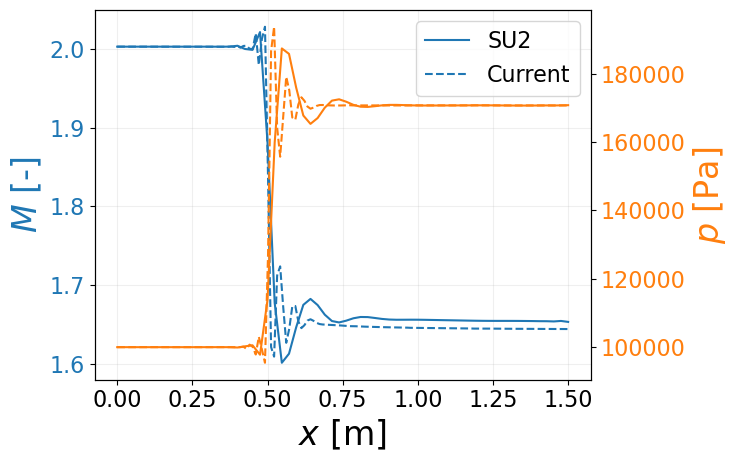

In [5]:
# Create figure and axes
fig, ax1 = plt.subplots()

# Primary y-axis: Mach number (C0)
ax1.plot(su2['Points_0'], su2['Mach'], '-', mfc='none', color='C0', label='SU2')
ax1.plot(ctbfm['x'][:,0,0], ctbfm['Mach'][:,0,0], '--', mfc='none', color='C0', label='Current')
ax1.set_xlabel(r'$x$ [m]')
ax1.set_ylabel(r'$M$ [-]', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.grid(alpha=0.2)

# Secondary y-axis: Pressure (C1)
ax2 = ax1.twinx()
ax2.plot(su2['Points_0'], su2['Pressure'], '-', mfc='none', color='C1')
ax2.plot(ctbfm['x'][:,0,0], ctbfm['Pressure'][:,0,0], '--', mfc='none', color='C1')
ax2.set_ylabel(r'$p$ [Pa]', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Build custom legend: only two entries (SU2 and Current)

ax1.legend(loc='best')

# Save figure
plt.savefig("Pictures/SupersonicWedge_Mach_Pressure.pdf", bbox_inches='tight')
# plt.show()